## How to use a Public API In Python

In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

parameters = {
  'start':'1',
  'limit':'100', # this is pulling in 5K rolls of diff crypto data so chnaging it will affect the dataset drastically.
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'b7b90bbe-8357-4f34-849a-5c7e38493936', #Our API key
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data) # we can comment this out if we dont want the code to print the messy json as output. i'll leave mine printed out.
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)



# we got the above code from the websites API documentation. 
# Always look into the API documentation well before using the code and API

In [2]:
# After running the above you will encounter the above error and to stop it you need to change the "data_rate_limit" from 
# the anaconda prompt by pasting this in "jupyter notebook --NotebookApp.iopub_data-rate_limit=1e10".
# this will increase the rate limit and open a new Jupyter notebook.
# BOOM it worked but idk why it didnt work on ALEXTHEANALYST own.
# But if that didn't work try using the local host URL as shown in the video.

In [3]:
type(data)

dict

In [73]:
# We need to put it into useable format as its super messy in its current state.

import pandas as pd


# this is us making sure no data is abbreviated into dots (...) this displays the entire columns as it is.


pd.set_option('display.max_columns', None)

# Automating Crypto Website API Pull Using Python 

In [76]:
# In automating scripts its great to add Timestamps so you can know the time the scripts where automatically ran etc 
# and also to keep track on whats happening.


df = pd.json_normalize(data['data']) # .head was to cut it short
# This noramlizes the data and makes it all pretty in a dataframe

df['timestamp'] = pd.to_datetime('now')
# this will show the timestamp for the exact time it ran. also putting it in df will create a new column for the new data input.


df

C:\Users\dikel\AppData\Local\Temp\ipykernel_9912\2438719046.py:8: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10163,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19347506.00000,19347506.00000,False,NaN,1,NaN,NaN,NaN,2023-04-16T03:20:00.000Z,30273.25000,11355926113.73629,-44.04500,-0.09565,-0.50485,7.96004,17.59707,36.82287,43.36867,585711885948.51514,46.12890,635738249928.38000,NaN,2023-04-16T03:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-16 03:22:26.181223
1,1027,Ethereum,ETH,ethereum,6730,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,119716878.43507,119716878.43507,False,NaN,2,NaN,NaN,NaN,2023-04-16T03:20:00.000Z,2089.50300,7439458052.76232,-44.73220,-0.14929,-0.18252,12.72932,22.10044,34.87144,33.18857,250148776629.14282,19.69790,250148776629.14001,NaN,2023-04-16T03:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-16 03:22:26.181223
2,825,Tether,USDT,tether,51292,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,80921811951.79570,84091735571.84531,False,NaN,3,NaN,NaN,NaN,2023-04-16T03:20:00.000Z,1.00095,22614356748.63840,-41.12670,0.02206,0.01674,0.04164,-0.13214,0.05602,0.06318,80998542898.52066,6.37820,84171472274.80000,NaN,2023-04-16T03:20:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-16 03:22:26.181223
3,1839,BNB,BNB,bnb,1263,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155865833.97461,155865833.97461,False,NaN,4,NaN,NaN,NaN,2023-04-16T03:20:00.000Z,332.53767,720652620.07368,-16.02580,-0.01271,0.97745,6.85478,0.28810,12.13828,8.83295,51831260607.34956,4.08210,51831260607.35000,NaN,2023-04-16T03:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-16 03:22:26.181223
4,3408,USD Coin,USDC,usd-coin,11812,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,31832462319.01659,31832462319.01659,False,NaN,5,NaN,NaN,NaN,2023-04-16T03:20:00.000Z,0.99988,3402435906.46330,-41.58320,0.00713,0.00206,-0.00934,0.00271,-0.02287,-0.01204,31828783508.45691,2.50690,31828783508.46000,NaN,2023-04-16T03:20:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-16 03:22:26.181223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2130,Enjin Coin,ENJ,enjin-coin,304,2017-11-01T00:00:00.000Z,"[media, collectibles-nfts, gaming, ethereum-ec...",1000000000.00000,1000000000.00000,1000000000.00000,False,NaN,96,NaN,NaN,NaN,2023-04-16T03:20:00.000Z,0.44182,21186554.09058,-45.80880,-0.02882,0.19762,0.70440,11.28284,0.05386,19.02481,441821479.08610,0.03480,441821479.09000,NaN,2023-04-16T03:20:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xf629cbd94d3791c9250152bd8dfbdf380e2a3b9c,2023-04-16 03:22:26.181223
96,1697,Basic Attention Token,BAT,basic-attention-token,371,2017-06-01T00:00:00.000Z,"[marketing, content-creation, defi, payments, ...",1500000000.00000,1488615298.41633,1500000000.00000,False,NaN,97,NaN,NaN,NaN,2023-04-16T03:20:00.000Z,0.28675,24498506.90744,-20.11340,0.12581,1.37164,2.36030,18.33012,-3.17196,21.26370,426862621.51281,0.03360,430127201.40000,NaN,2023-04-16T03:20:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x0d8775f648430679a709e98d2b0cb6250d2887ef,2023-04-16 03:22:26.181223
97,7653,Oasis Network,ROSE,oasis-network,75,2020-11-12T00:00:00.000Z,"[cosmos-

### Create the Automating Function and this will run the API anytime we need it run.

In [10]:
# Create the Automating Function and this will run the API anytime we need it run.


def api_runner():          # 1st. We put the initial API code in a function 
    global df 
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    # It will call this API    
    parameters = {
      'start':'1',
      'limit':'20', # this is pulling in 5K rolls of diff crypto data so chnaging it will affect the dataset drastically.
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'b7b90bbe-8357-4f34-849a-5c7e38493936', # Call the APi with Our API key.
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data) # we can comment this out if we dont want the code to print the messy json as output. i'll leave mine printed out.
    except (ConnectionError, Timeout, TooManyRedirects) as e:
       print(e)

    # this is the formatting bit of the code to clean it out.
    
    # changing df to df2 so it does'nt affect the original df.
    
    #df = pd.json_normalize(data['data'])    # formatting
    #df['timestamp'] = pd.to_datetime('now') # Timestamp

    df  # after you have ran the function with the lines above you can choose to remove the lines or leave them in.
    
    # first line of df2: Creates the dataframe and normalizes the JSON data. --> df2 = pd.json_normalize(data['data'])
    #2nd Line of df2: Creates the Timestamp  ----->>                                    df2['timestamp'] = pd.to_datetime('now')
    # last line df: this just appends the new data from df2 to the original data df --> df = df.append(df2)
    
    #NOTE: all this will chnage when we are done chnaging the as we want just 1 DF and the new data will be deleted
    # therefore we will delete those df2 to df to ensure its not duplicated all over.
    
    # The dataframe.append method is deprecated and will be removed from pandas in a future version. Use "pandas.concat" instead. 
    

    """
    What you can do  is instead of just putting it into a data frame 
    you can actually append the data to a csv  and have that csv sitting out there for you  
    instead of just keeping it all in the data frame  and there's a lot of different uses for that  
    you may want to have that file separately from  here just in case something times out or something  
    breaks which is a legitimate concern or your  computer shuts off or or something like that   that is a legitimate concern.
    """
    
    
    if not os.path.isfile(r'C:\Users\dikel\Documents\Python Scripts\API.csv'):
        df.to_csv(r'C:\Users\dikel\Documents\Python Scripts\API.csv', header= 'column_names')
    else:
        df.to_csv(r'C:\Users\dikel\Documents\Python Scripts\API.csv', mode ='a', header= False)
                  
# This line of code appends the new dataset to the already existing one instead of leaving it to creat a new one very often.
         # the 1 & 2 lines csv codes above checks if the API files exist inputted exists else it creates a new one with a new dataset.
                  
                  
                  # The =False to is take out the Headers after adding it at the turn.
                  # mode  =a stands for append
                       

# this checks if there an file under this the drectory path or else it creates one for it.
# And if it already exists append the new data to the already existing ones

## How to automate running the python scripts


In [11]:
# How to automate running the python scripts

# what these are going to do is they're going  to give us the ability to track the time  
# and we're going to be able to run through and call  this function in certain intervals that we want.

import os 
from time import time 
from time import sleep


# create a for loop
# (333) means the calling the APi 333 times as it our max per day.

for i in range(333):
    api_runner()
    print('API Runner Completed Successfully') # this is a prompt to show it worked
    sleep (60) # sleep for 1 minute / This means we are gonna make it run every 1min then sleeps and go again after 1min
exit()

API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully


KeyboardInterrupt: 

In [136]:
df10 = pd.read_csv(r'C:\Users\dikel\Documents\Python Scripts\API.csv')
df10

# This is to call the csv to know if our Theory worked and yes it did.
# The 1 minute differnce in timestamps worked 
# and the data was appended 3x to the original dataset creating a chnage in price overtime

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10163,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19347056.00000,19347056.00000,False,NaN,1,NaN,NaN,NaN,2023-04-15T15:32:00.000Z,30428.01988,14673896131.43485,-30.73450,0.10100,0.76964,8.58804,22.42127,37.16683,45.84562,588692604662.13391,46.07900,638988417561.04004,NaN,2023-04-15T15:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-15 15:34:43.732014
1,1,1027,Ethereum,ETH,ethereum,6729,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120109686.10816,120109686.10816,False,NaN,2,NaN,NaN,NaN,2023-04-15T15:32:00.000Z,2102.97909,9867565732.95898,-32.91970,0.07493,2.14721,12.53394,26.63770,35.39595,36.18457,252588158337.12903,19.77090,252588158337.13000,NaN,2023-04-15T15:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-15 15:34:43.732014
2,2,825,Tether,USDT,tether,51284,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,80911811951.89569,84091735571.84531,False,NaN,3,NaN,NaN,NaN,2023-04-15T15:32:00.000Z,1.00092,28571211867.67747,-26.61370,0.00866,0.03471,0.04173,-0.11199,0.02970,0.05790,80986175005.72339,6.33930,84169021175.86000,NaN,2023-04-15T15:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-15 15:34:43.732014
3,3,1839,BNB,BNB,bnb,1262,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155865907.83684,155865907.83684,False,NaN,4,NaN,NaN,NaN,2023-04-15T15:32:00.000Z,335.49861,750483758.96801,-14.80100,0.39056,2.70955,7.41685,3.09686,12.21042,11.21106,52292795512.97993,4.09330,52292795512.98000,NaN,2023-04-15T15:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-15 15:34:43.732014
4,4,3408,USD Coin,USDC,usd-coin,11805,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,31831761945.81578,31831761945.81578,False,NaN,5,NaN,NaN,NaN,2023-04-15T15:32:00.000Z,0.99988,4454247354.60148,-22.02500,0.00944,0.02927,-0.00275,0.01917,-0.02277,-0.02198,31827816932.39417,2.49140,31827816932.39000,NaN,2023-04-15T15:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-15 15:34:43.732014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,15,1958,TRON,TRX,tron,749,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem']",NaN,90813979916.36960,90814120730.60982,False,NaN,16,71659659264.00000,4733873668.16058,NaN,2023-04-15T16:28:00.000Z,0.06606,169051488.63609,-33.96510,-0.19894,0.42710,-0.56494,-0.54568,-0.33638,5.97606,5999217867.38020,0.47050,5999227169.64000,NaN,2023-04-15T16:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-15 16:29:28.470671
156,16,4943,Dai,DAI,multi-collateral-dai,2185,2019-11-22T00:00:00.000Z,"['defi', 'stablecoin', 'asset-backed-stablecoi...",NaN,5205126820.05956,5205126820.05956,False,NaN,17,NaN,NaN,NaN,2023-04-15T16:28:00.000Z,0.99954,79633515.84810,-41.73240,-0.06370,0.09354,-0.01207,0.00471,-0.00163,-0.09053,5202710491.06359,0.40800,5202710491.06000,NaN,2023-04-15T16:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,2023-04-15 16:29:28.470671
157,17,3717,Wrapped Bitcoin,WBTC,wrapped-bitcoin,1132,2019-01-30T00:00:00.000Z,"['medium-of-exchange', 'defi', 'wrapped-tokens...",NaN,

## Cleaning/ formatting out the Data into its simplest form useable form.

In [93]:
df10

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10163,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19347056.00000,19347056.00000,False,NaN,1,NaN,NaN,NaN,2023-04-15T15:32:00.000Z,30428.01988,14673896131.43485,-30.73450,0.10100,0.76964,8.58804,22.42127,37.16683,45.84562,588692604662.13391,46.07900,638988417561.04004,NaN,2023-04-15T15:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-15 15:34:43.732014
1,1,1027,Ethereum,ETH,ethereum,6729,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120109686.10816,120109686.10816,False,NaN,2,NaN,NaN,NaN,2023-04-15T15:32:00.000Z,2102.97909,9867565732.95898,-32.91970,0.07493,2.14721,12.53394,26.63770,35.39595,36.18457,252588158337.12903,19.77090,252588158337.13000,NaN,2023-04-15T15:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-15 15:34:43.732014
2,2,825,Tether,USDT,tether,51284,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,80911811951.89569,84091735571.84531,False,NaN,3,NaN,NaN,NaN,2023-04-15T15:32:00.000Z,1.00092,28571211867.67747,-26.61370,0.00866,0.03471,0.04173,-0.11199,0.02970,0.05790,80986175005.72339,6.33930,84169021175.86000,NaN,2023-04-15T15:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-15 15:34:43.732014
3,3,1839,BNB,BNB,bnb,1262,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155865907.83684,155865907.83684,False,NaN,4,NaN,NaN,NaN,2023-04-15T15:32:00.000Z,335.49861,750483758.96801,-14.80100,0.39056,2.70955,7.41685,3.09686,12.21042,11.21106,52292795512.97993,4.09330,52292795512.98000,NaN,2023-04-15T15:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-15 15:34:43.732014
4,4,3408,USD Coin,USDC,usd-coin,11805,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,31831761945.81578,31831761945.81578,False,NaN,5,NaN,NaN,NaN,2023-04-15T15:32:00.000Z,0.99988,4454247354.60148,-22.02500,0.00944,0.02927,-0.00275,0.01917,-0.02277,-0.02198,31827816932.39417,2.49140,31827816932.39000,NaN,2023-04-15T15:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-15 15:34:43.732014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,15,1958,TRON,TRX,tron,749,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem']",NaN,90813979916.36960,90814120730.60982,False,NaN,16,71659659264.00000,4733873668.16058,NaN,2023-04-15T16:28:00.000Z,0.06606,169051488.63609,-33.96510,-0.19894,0.42710,-0.56494,-0.54568,-0.33638,5.97606,5999217867.38020,0.47050,5999227169.64000,NaN,2023-04-15T16:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-15 16:29:28.470671
156,16,4943,Dai,DAI,multi-collateral-dai,2185,2019-11-22T00:00:00.000Z,"['defi', 'stablecoin', 'asset-backed-stablecoi...",NaN,5205126820.05956,5205126820.05956,False,NaN,17,NaN,NaN,NaN,2023-04-15T16:28:00.000Z,0.99954,79633515.84810,-41.73240,-0.06370,0.09354,-0.01207,0.00471,-0.00163,-0.09053,5202710491.06359,0.40800,5202710491.06000,NaN,2023-04-15T16:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,2023-04-15 16:29:28.470671
157,17,3717,Wrapped Bitcoin,WBTC,wrapped-bitcoin,1132,2019-01-30T00:00:00.000Z,"['medium-of-exchange', 'defi', 'wrapped-tokens...",NaN,

In [134]:
# this is to convert the numerical values from the scientific form (1.508501e+05) to float ..

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [135]:
df10

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10163,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19347056.00000,19347056.00000,False,NaN,1,NaN,NaN,NaN,2023-04-15T15:32:00.000Z,30428.01988,14673896131.43485,-30.73450,0.10100,0.76964,8.58804,22.42127,37.16683,45.84562,588692604662.13391,46.07900,638988417561.04004,NaN,2023-04-15T15:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-15 15:34:43.732014
1,1,1027,Ethereum,ETH,ethereum,6729,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120109686.10816,120109686.10816,False,NaN,2,NaN,NaN,NaN,2023-04-15T15:32:00.000Z,2102.97909,9867565732.95898,-32.91970,0.07493,2.14721,12.53394,26.63770,35.39595,36.18457,252588158337.12903,19.77090,252588158337.13000,NaN,2023-04-15T15:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-15 15:34:43.732014
2,2,825,Tether,USDT,tether,51284,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,80911811951.89569,84091735571.84531,False,NaN,3,NaN,NaN,NaN,2023-04-15T15:32:00.000Z,1.00092,28571211867.67747,-26.61370,0.00866,0.03471,0.04173,-0.11199,0.02970,0.05790,80986175005.72339,6.33930,84169021175.86000,NaN,2023-04-15T15:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-15 15:34:43.732014
3,3,1839,BNB,BNB,bnb,1262,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155865907.83684,155865907.83684,False,NaN,4,NaN,NaN,NaN,2023-04-15T15:32:00.000Z,335.49861,750483758.96801,-14.80100,0.39056,2.70955,7.41685,3.09686,12.21042,11.21106,52292795512.97993,4.09330,52292795512.98000,NaN,2023-04-15T15:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-15 15:34:43.732014
4,4,3408,USD Coin,USDC,usd-coin,11805,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,31831761945.81578,31831761945.81578,False,NaN,5,NaN,NaN,NaN,2023-04-15T15:32:00.000Z,0.99988,4454247354.60148,-22.02500,0.00944,0.02927,-0.00275,0.01917,-0.02277,-0.02198,31827816932.39417,2.49140,31827816932.39000,NaN,2023-04-15T15:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-15 15:34:43.732014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,15,1958,TRON,TRX,tron,749,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem']",NaN,90813979916.36960,90814120730.60982,False,NaN,16,71659659264.00000,4733873668.16058,NaN,2023-04-15T16:28:00.000Z,0.06606,169051488.63609,-33.96510,-0.19894,0.42710,-0.56494,-0.54568,-0.33638,5.97606,5999217867.38020,0.47050,5999227169.64000,NaN,2023-04-15T16:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-15 16:29:28.470671
156,16,4943,Dai,DAI,multi-collateral-dai,2185,2019-11-22T00:00:00.000Z,"['defi', 'stablecoin', 'asset-backed-stablecoi...",NaN,5205126820.05956,5205126820.05956,False,NaN,17,NaN,NaN,NaN,2023-04-15T16:28:00.000Z,0.99954,79633515.84810,-41.73240,-0.06370,0.09354,-0.01207,0.00471,-0.00163,-0.09053,5202710491.06359,0.40800,5202710491.06000,NaN,2023-04-15T16:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,2023-04-15 16:29:28.470671
157,17,3717,Wrapped Bitcoin,WBTC,wrapped-bitcoin,1132,2019-01-30T00:00:00.000Z,"['medium-of-exchange', 'defi', 'wrapped-tokens...",NaN,

In [145]:
# we want to pull out the Percentage changes over the various days.

df3 = df10.groupby('name', sort= False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d', 'quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

df3

# we are grouping by name, we should not to Sort therefore False.
# We are sorting everything with with .mean() --> Average

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.16196,0.54417,8.39396,22.14925,37.46855,45.35097
Ethereum,0.04105,2.23434,12.65340,26.61681,35.98045,35.90764
Tether,-0.00483,0.02404,0.03341,-0.11111,0.01229,0.04713
BNB,-0.24969,2.67521,7.06086,2.51431,12.55001,10.81272
USD Coin,-0.00481,0.01100,-0.00581,-0.00250,-0.01000,-0.02471
XRP,-0.17347,1.25878,2.54476,43.78965,39.13441,35.02361
Cardano,-0.37813,6.36519,17.84756,39.92684,21.17386,30.63411
Dogecoin,-0.31063,2.88528,7.05059,25.87965,7.54264,4.26045
Polygon,-0.07657,2.85857,5.57571,3.51443,-4.24208,19.21880


In [32]:
# we want to make this visualizable and convert the "Percentage change" to rows

df4 = df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h    -0.16196
         quote.USD.percent_change_24h    0.54417
         quote.USD.percent_change_7d     8.39396
         quote.USD.percent_change_30d   22.14925
         quote.USD.percent_change_60d   37.46855
                                          ...   
Uniswap  quote.USD.percent_change_24h    2.57084
         quote.USD.percent_change_7d     5.76305
         quote.USD.percent_change_30d    6.91736
         quote.USD.percent_change_60d   -1.28832
         quote.USD.percent_change_90d   -3.85590
Length: 120, dtype: float64

In [34]:
type(df4)

pandas.core.series.Series

In [35]:
df5 = df4.to_frame(name = 'values')
df5 

# Now we have stacked the columns into ROWS thereby converting it into a series as seen above we will convert it back to dataframe.

values
name                                         
Bitcoin quote.USD.percent_change_1h  -0.16196
        quote.USD.percent_change_24h  0.54417
        quote.USD.percent_change_7d   8.39396
        quote.USD.percent_change_30d 22.14925
        quote.USD.percent_change_60d 37.46855
...                                       ...
Uniswap quote.USD.percent_change_24h  2.57084
        quote.USD.percent_change_7d   5.76305
        quote.USD.percent_change_30d  6.91736
        quote.USD.percent_change_60d -1.28832
        quote.USD.percent_change_90d -3.85590

[120 rows x 1 columns]

In [37]:
type(df5)

pandas.core.frame.DataFrame

In [38]:
df5.count()

values    120
dtype: int64

In [40]:
# we want to remove 'Name' from being the index. We want to change the index of df5 basically.

index = pd.Index(range(120))

df6 = df5.reset_index()
df6

# Now its in the perfect other for visualization

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.16196
1,Bitcoin,quote.USD.percent_change_24h,0.54417
2,Bitcoin,quote.USD.percent_change_7d,8.39396
3,Bitcoin,quote.USD.percent_change_30d,22.14925
4,Bitcoin,quote.USD.percent_change_60d,37.46855
...,...,...,...
115,Uniswap,quote.USD.percent_change_24h,2.57084
116,Uniswap,quote.USD.percent_change_7d,5.76305
117,Uniswap,quote.USD.percent_change_30d,6.91736
118,Uniswap,quote.USD.percent_change_60d,-1.28832


In [54]:
# renaming the level_1 column

df7 = df6.rename(columns ={'level_1': 'Percentage_change', 'name':'Name', 'values':'Values'})

df7

,Name,Percentage_change,Values
0,Bitcoin,quote.USD.percent_change_1h,-0.16196
1,Bitcoin,quote.USD.percent_change_24h,0.54417
2,Bitcoin,quote.USD.percent_change_7d,8.39396
3,Bitcoin,quote.USD.percent_change_30d,22.14925
4,Bitcoin,quote.USD.percent_change_60d,37.46855
...,...,...,...
115,Uniswap,quote.USD.percent_change_24h,2.57084
116,Uniswap,quote.USD.percent_change_7d,5.76305
117,Uniswap,quote.USD.percent_change_30d,6.91736
118,Uniswap,quote.USD.percent_change_60d,-1.28832


In [66]:
# To rename the 'percentage change column to mke it shorter'

df7['Percentage_change']= df7['Percentage_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

df7

,Name,Percentage_change,Values
0,Bitcoin,1h,-0.16196
1,Bitcoin,24h,0.54417
2,Bitcoin,7d,8.39396
3,Bitcoin,30d,22.14925
4,Bitcoin,60d,37.46855
...,...,...,...
115,Uniswap,24h,2.57084
116,Uniswap,7d,5.76305
117,Uniswap,30d,6.91736
118,Uniswap,60d,-1.28832


# Visualizing our Data Percentage change over time


In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

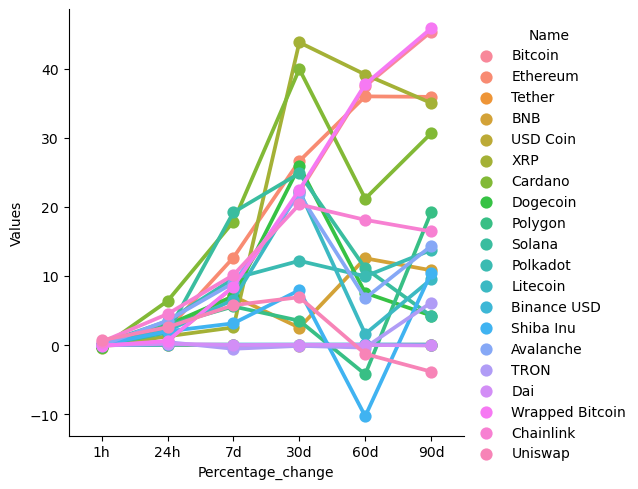

In [68]:
# we had to put df6 into df7 for this to work.

sns.catplot(x='Percentage_change',
            y= 'Values',
            hue= 'Name',
            data= df7,
            kind= 'point');

In [123]:
# Incase we want to look at and visualize just individual currencies

df11 = df10[['name','quote.USD.price','timestamp']]
df11 = df11.query("name == 'Bitcoin'")
df11

,name,quote.USD.price,timestamp
0,Bitcoin,30428.01988,2023-04-15 15:34:43.732014
20,Bitcoin,30426.04274,2023-04-15 15:35:43.986424
40,Bitcoin,30427.71142,2023-04-15 15:36:44.654846
60,Bitcoin,30330.17518,2023-04-15 16:28:28.207812
80,Bitcoin,30336.71162,2023-04-15 16:29:28.470671
100,Bitcoin,30336.71162,2023-04-15 16:29:28.470671
120,Bitcoin,30336.71162,2023-04-15 16:29:28.470671
140,Bitcoin,30336.71162,2023-04-15 16:29:28.470671


C:\Users\dikel\AppData\Local\Temp\ipykernel_9912\1750505122.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(ax.get_xticklabels(), rotation=45);


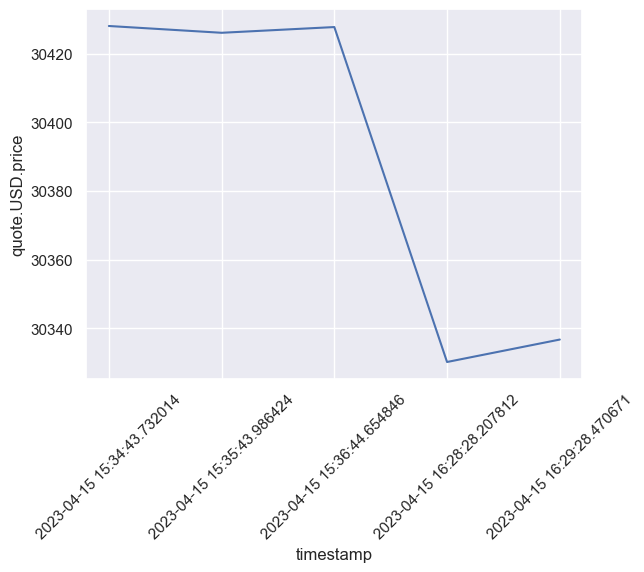

In [147]:
sns.set_theme(style= 'darkgrid') # or sns.set_style('darkgrid')

axes = sns.lineplot(x='timestamp', 
                    y='quote.USD.price', 
                    data=df11)

axes.set_xticklabels(ax.get_xticklabels(), rotation=45);
# Had to google how to get the rotation bit for hours :))

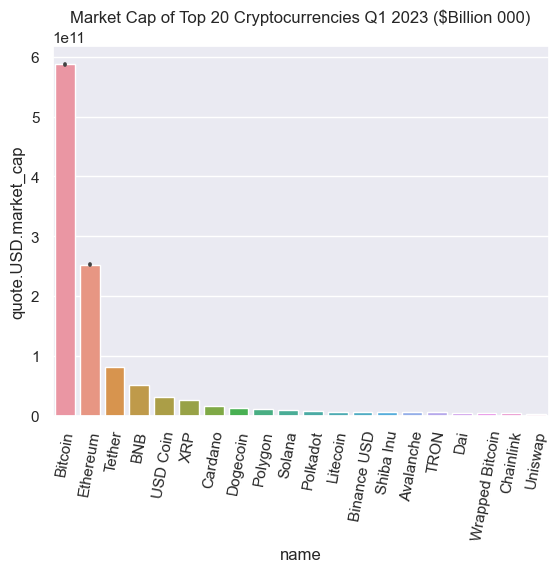

In [233]:
# Market Cap of Top 20 Cryptocurrencies Q1 2023

axes = sns.barplot(x='name',
            y= 'quote.USD.market_cap',
            data= df10)

axes.set_xticklabels(axes.get_xticklabels(), rotation= 80);

axes.set(title='Market Cap of Top 20 Cryptocurrencies Q1 2023 ($Billion 000)');